## Dataset analysis and pre-processing

In [3]:
import pandas as pd
import os

current_dir = os.getcwd()
#print("current_dir: " + current_dir)
csv_path = os.path.join(current_dir, 'data', 'filmtv_movies.csv')
#print("csv_path: " + csv_path)

csv_path = os.path.normpath(csv_path)

dataset = pd.read_csv(csv_path)

### Dataset analysis

In [4]:
# First dataset rows inspection
dataset.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.7,6.00,5.0,10,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [5]:
# Columns and data type check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41399 entries, 0 to 41398
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     41399 non-null  int64  
 1   title         41399 non-null  object 
 2   year          41399 non-null  int64  
 3   genre         41304 non-null  object 
 4   duration      41399 non-null  int64  
 5   country       41389 non-null  object 
 6   directors     41365 non-null  object 
 7   actors        39272 non-null  object 
 8   avg_vote      41399 non-null  float64
 9   critics_vote  36703 non-null  float64
 10  public_vote   41205 non-null  float64
 11  total_votes   41399 non-null  int64  
 12  description   39857 non-null  object 
 13  notes         18797 non-null  object 
 14  humor         41399 non-null  int64  
 15  rhythm        41399 non-null  int64  
 16  effort        41399 non-null  int64  
 17  tension       41399 non-null  int64  
 18  erotism       41399 non-nu

In [6]:
# Unique values count
dataset.nunique(axis=0, dropna=True)

filmtv_id       41399
title           39531
year              115
genre              30
duration          269
country          2087
directors       14752
actors          39142
avg_vote           90
critics_vote      625
public_vote        10
total_votes       592
description     39751
notes           18623
humor               6
rhythm              6
effort              6
tension             6
erotism             6
dtype: int64

### 'notes' column drop
Since the 'notes' columns does not add relevant information about movies and has almost 20k missing values, I decided to drop it.

In [7]:
# Drop 'notes' column
dataset = dataset.drop(columns=['notes'])
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'humor', 'rhythm', 'effort', 'tension',
       'erotism'],
      dtype='object')

### Missing values management

In [8]:
# Missing values count
dataset.isnull().sum()

filmtv_id          0
title              0
year               0
genre             95
duration           0
country           10
directors         34
actors          2127
avg_vote           0
critics_vote    4696
public_vote      194
total_votes        0
description     1542
humor              0
rhythm             0
effort             0
tension            0
erotism            0
dtype: int64

Since the columns 'genre', 'country' and 'directors' have very few missing values, I drop rows where at least one of these columns has a null value.
Columns like 'actors', 'public_vote' and 'critics_vote' will have a role in the next preprocessig steps and in the final recommandation model, so I decided to drop movies with missing values in those columns.

Missing values in the column 'description' should not cause problem in further steps, so I decided to not drop them.

In [9]:
# Drop rows where 'genre', 'country', or 'directors' have missing values
dataset = dataset.dropna(subset=['genre', 'country', 'directors', 'actors', 'public_vote', 'critics_vote'])
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 34625 entries, 1 to 41391
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     34625 non-null  int64  
 1   title         34625 non-null  object 
 2   year          34625 non-null  int64  
 3   genre         34625 non-null  object 
 4   duration      34625 non-null  int64  
 5   country       34625 non-null  object 
 6   directors     34625 non-null  object 
 7   actors        34625 non-null  object 
 8   avg_vote      34625 non-null  float64
 9   critics_vote  34625 non-null  float64
 10  public_vote   34625 non-null  float64
 11  total_votes   34625 non-null  int64  
 12  description   33479 non-null  object 
 13  humor         34625 non-null  int64  
 14  rhythm        34625 non-null  int64  
 15  effort        34625 non-null  int64  
 16  tension       34625 non-null  int64  
 17  erotism       34625 non-null  int64  
dtypes: float64(3), int64(9), object

filmtv_id          0
title              0
year               0
genre              0
duration           0
country            0
directors          0
actors             0
avg_vote           0
critics_vote       0
public_vote        0
total_votes        0
description     1146
humor              0
rhythm             0
effort             0
tension            0
erotism            0
dtype: int64

### Duplicates check
I have searched in the dataset for duplicates row. As it can be seen below, there are no duplicates in the dataset. 

In [10]:
# Duplicates row search
print(dataset.duplicated().sum())

0


### Data type conversion

In [11]:
# Convert the selected columns to string type
dataset['title'] = dataset['title'].astype(str)
dataset['actors'] = dataset['actors'].astype(str)
dataset['directors'] = dataset['directors'].astype(str)
dataset['description'] = dataset['description'].astype(str)
dataset['country'] = dataset['country'].astype(str)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34625 entries, 1 to 41391
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     34625 non-null  int64  
 1   title         34625 non-null  object 
 2   year          34625 non-null  int64  
 3   genre         34625 non-null  object 
 4   duration      34625 non-null  int64  
 5   country       34625 non-null  object 
 6   directors     34625 non-null  object 
 7   actors        34625 non-null  object 
 8   avg_vote      34625 non-null  float64
 9   critics_vote  34625 non-null  float64
 10  public_vote   34625 non-null  float64
 11  total_votes   34625 non-null  int64  
 12  description   34625 non-null  object 
 13  humor         34625 non-null  int64  
 14  rhythm        34625 non-null  int64  
 15  effort        34625 non-null  int64  
 16  tension       34625 non-null  int64  
 17  erotism       34625 non-null  int64  
dtypes: float64(3), int64(9), object

### Votes analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Get summary statistics of vote counts
dataset['total_votes'].describe()

count    34625.000000
mean        41.759884
std         73.515840
min          2.000000
25%          6.000000
50%         15.000000
75%         43.000000
max       1082.000000
Name: total_votes, dtype: float64

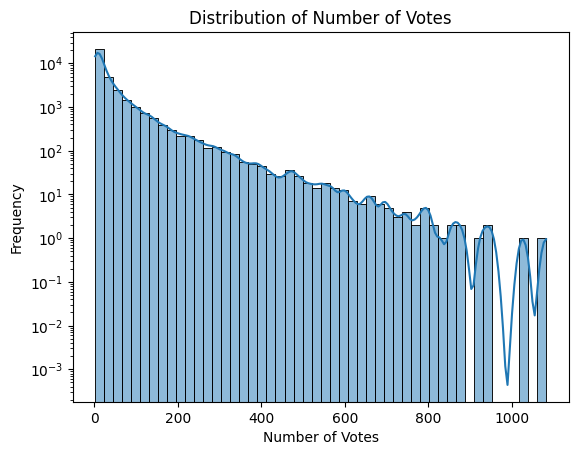

In [14]:
# Plot the distribution of vote counts
sns.histplot(dataset['total_votes'], bins=50, kde=True)
plt.title("Distribution of Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

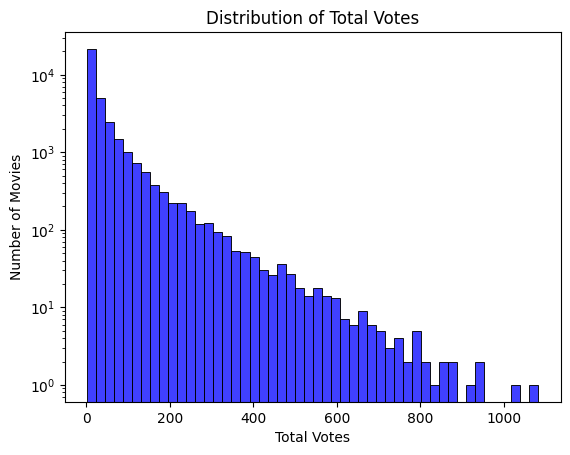

In [15]:
sns.histplot(dataset['total_votes'], bins=50, kde=False, color='blue')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Number of Movies')
plt.yscale('log')  # Optional: Use log scale for better visualization if data is skewed
plt.show()

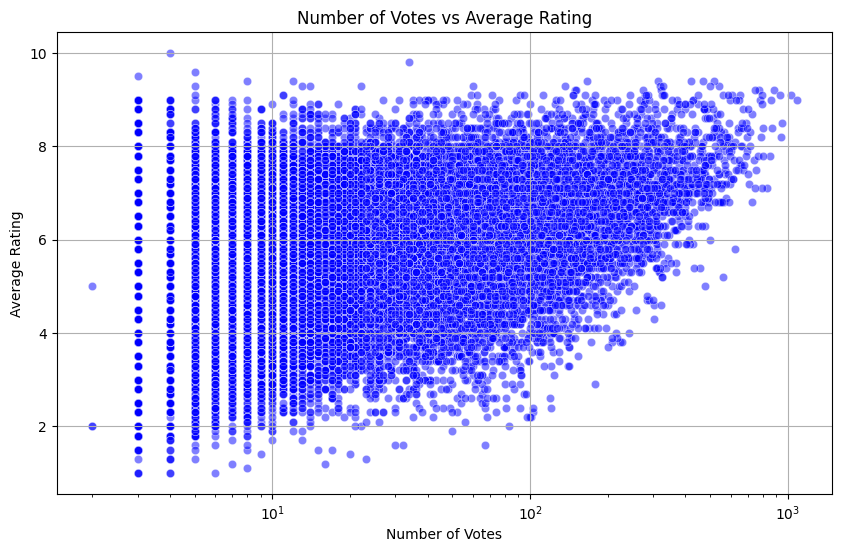

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='total_votes', y='avg_vote', alpha=0.5, color='blue')
plt.title('Number of Votes vs Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')  # Optional: Use log scale for better visibility of outliers
plt.grid(True)
plt.show()

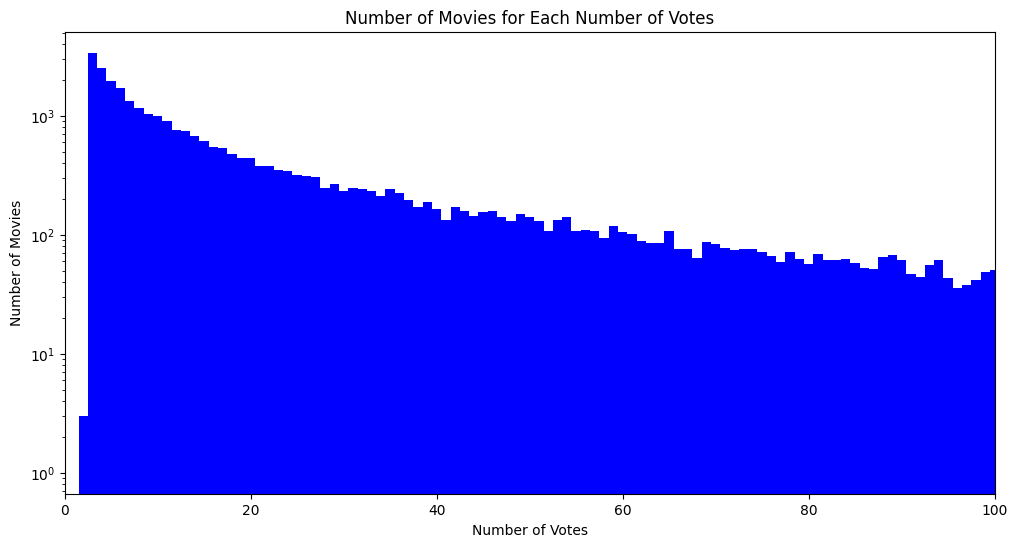

In [17]:
# Group the dataset by 'total_votes' and count the number of movies for each vote count
votes_count = dataset['total_votes'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(votes_count.index, votes_count.values, color='blue', width=1.0)
plt.title('Number of Movies for Each Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.xlim(0, 100)  # Optional: Limit x-axis to a smaller range for better visibility
plt.yscale('log')  # Optional: Use log scale if the distribution is heavily skewed
plt.show()

### Movies ratings
This dataset, for each movie, is taking into account:
- average of all the votes;
- public votes;
- critics votes;
- number of all the votes received.

Since I want the final rating of a movie to be a single number and 'public_vote' and 'critics_vote' columns have many missing values, I decided to drop these columns and to base movies ratings on:
- the average of all the votes received by the movie;
- the number of all the votes received by the movie.

'avg_vote' and 'total_votes' columns have not missing values. This has encouraged me on considering only these two columns for the "weighted ratings" even more.

In [18]:
# Drop 'public_vote' and 'critics_vote' column
dataset = dataset.drop(columns=['public_vote', 'critics_vote'])
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism'],
      dtype='object')

As I stated before, the final rating column will represent a weighted rating based on the average vote and the number of votes received by each movie.

The weighted rating will "weight" more movies with high number of total votes received. This way, the most reliable rating will be the ones with high number of votes. Insteead, movies with a low number of votes will be rated with a value closer to the average of all the votes in the dataset than its own average vote value. This means that movies with few votes will count less, since they are not so realiable.

This rating system bases its final votes using some parameters/constants:
- `global_avg`: the global average of the 'avg_votes' between all the movies in the dataset;
- `min_num_of_votes`: constant that represents the minimun number of votes a movie must have to be considered "reliable" (with respect on the 'avg_vote').

I decided to set `min_num_of_votes` to 43 because the 75% of the movies in the dataset have 43 or fewer votes (see the "Votes analysis" section and the "Distribution of Weighted Ratings for Different `min_num_of_votes` Values" plot).

In [19]:
global_avg = dataset['avg_vote'].mean()
print("Global average vote: ", global_avg)

min_num_of_votes = 43

# Weighted rating definition
def weighted_rating(x, m=min_num_of_votes, G=global_avg):
    v = x['total_votes']  # Number of votes
    R = x['avg_vote']   # Average rating
    return (v / (v + m) * R) + (m / (v + m) * G)

# Weigthed rating application to the dataset
dataset['weighted_rating'] = dataset.apply(weighted_rating, axis=1)

Global average vote:  5.869634657039712


In [20]:
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating'],
      dtype='object')

In [21]:
# Sort by the weighted rating in discending order
top_movies_weighted_discending = dataset.sort_values('weighted_rating', ascending=False)

# Display the top 10 movies sorting by the weighted rating in discending order
print("Discending ratings based on weights:")
print(top_movies_weighted_discending[['title', 'avg_vote', 'total_votes', 'weighted_rating']].head(10))

# Sort by the weighted rating in ascending order
top_movies_weighted_ascending = dataset.sort_values('weighted_rating', ascending=True)

# Display the top 10 movies sorting by the weighted rating in ascending order
print("Ascending ratings based on weights:")
print(top_movies_weighted_ascending[['title', 'avg_vote', 'total_votes', 'weighted_rating']].head(10))

# Sort by the "normal" rating in discending order
top_movies_avg_discenging = dataset.sort_values('avg_vote', ascending=False)

# Display the top 10 movies sorting by the "normal" rating in discending order
print("Discending ratings based on avg:")
print(top_movies_avg_discenging[['title', 'avg_vote', 'total_votes', 'weighted_rating']].head(10))

# Sort by the "normal" rating in ascending order
top_movies_avg_ascending = dataset.sort_values('avg_vote', ascending=True)

# Display the top 10 movies sorting by the "normal" rating in ascending
print("Ascending ratings based on avg:")
print(top_movies_avg_ascending[['title', 'avg_vote', 'total_votes', 'weighted_rating']].head(10))

Discending ratings based on weights:
                      title  avg_vote  total_votes  weighted_rating
5169       Sunset Boulevard       9.4          517         9.128918
2562    Ladri di biciclette       9.4          469         9.103504
4678           Modern Times       9.4          420         9.072126
3762           Citizen Kane       9.3          542         9.047853
1314  2001: A Space Odyssey       9.2          881         9.045015
8369         Paths of Glory       9.3          498         9.027346
3330          The Godfather       9.2          772         9.024287
3719                 Psycho       9.2          744         9.018036
2650            City Lights       9.4          314         8.974774
4321            The Shining       9.1         1026         8.970060
Ascending ratings based on weights:
                                 title  avg_vote  total_votes  weighted_rating
30791                Tutto molto bello       1.6           67         3.269039
18005                

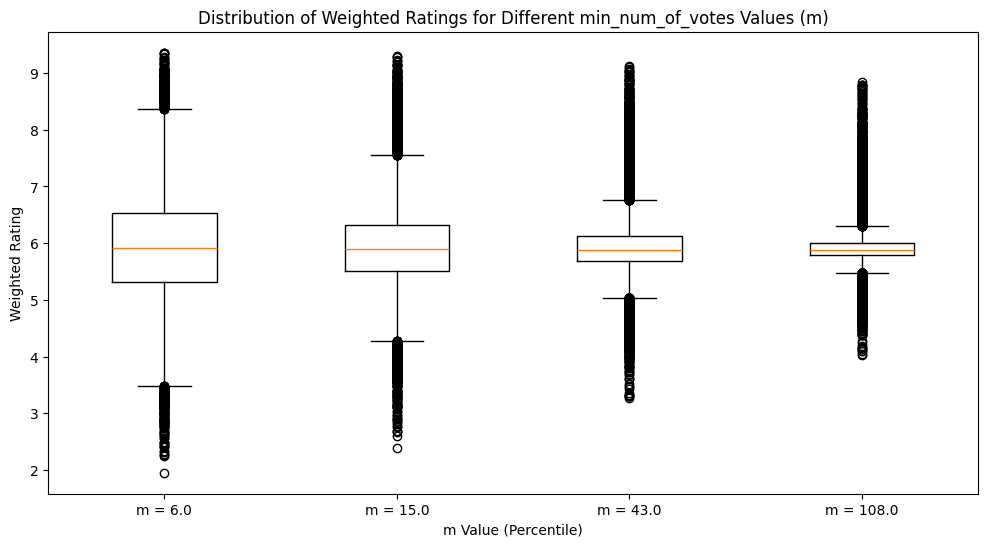

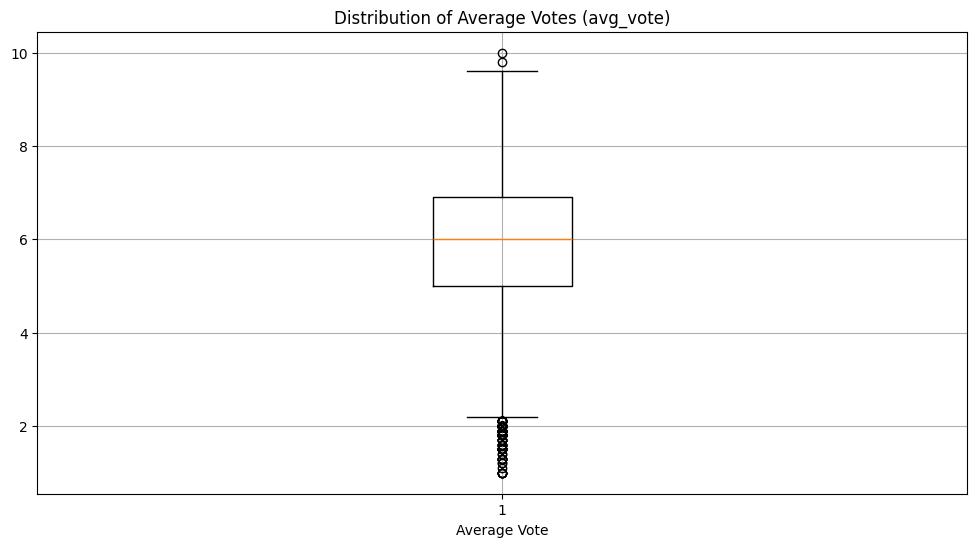

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating'],
      dtype='object')

In [22]:
import numpy as np

# Test different values of m (e.g., median, 75th percentile, 90th percentile)
percentiles = [25, 50, 75, 90]  # Percentiles to test
m_values = [np.percentile(dataset['total_votes'], p) for p in percentiles]

# Create a new column for each weighted rating based on different m values
for m_value in m_values:
    dataset[f'weighted_rating_m_{m_value}'] = dataset.apply(weighted_rating, m=m_value, axis=1)

# Plot the distribution of weighted ratings for different m values
plt.figure(figsize=(12, 6))

# Use a boxplot to compare the distribution of weighted ratings for each m value
ratings_columns = [f'weighted_rating_m_{m_value}' for m_value in m_values]
plt.boxplot([dataset[col] for col in ratings_columns], tick_labels=[f'm = {m_value}' for m_value in m_values])

plt.title('Distribution of Weighted Ratings for Different min_num_of_votes Values (m)')
plt.ylabel('Weighted Rating')
plt.xlabel('m Value (Percentile)')
plt.show()


plt.figure(figsize=(12, 6))
plt.boxplot(dataset['avg_vote'])

plt.title('Distribution of Average Votes (avg_vote)')
plt.xlabel('Average Vote')
plt.grid(True)
plt.show()

dataset.columns

dataset = dataset.drop(columns=['weighted_rating_m_6.0',
                                'weighted_rating_m_15.0',
                                'weighted_rating_m_43.0',
                                'weighted_rating_m_108.0'])
dataset.columns

"Distribution of Weighted Ratings for Different `min_num_of_votes` Values" plot comments considering also results :
- `min_num_of_votes = 6`: ratings rely too much on movies with few votes (weighted votes results not so reliable indeed);
- `min_num_of_votes = 15`: more balanced solution. Weighted ratings rely on movie with a higher number of votes;
- `min_num_of_votes = 43`: another balanced solution. Weighted ratings rely on movie with a higher number of votes and are a well spreaded
- `min_num_of_votes = 108`: exaggerated considering than 75% of the movies have less than 43 votes...

### Duration analysis

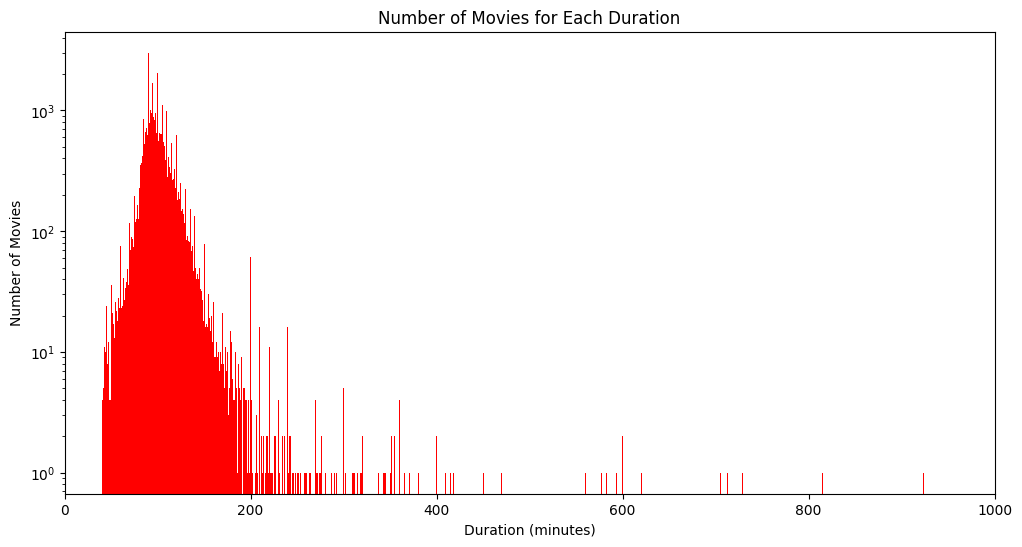

In [23]:
# Group the dataset by 'duration' and count the number of movies for each duration count
votes_count = dataset['duration'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(votes_count.index, votes_count.values, color='red', width=1.0)
plt.title('Number of Movies for Each Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xlim(0, 1000)  # Optional: Limit x-axis to a smaller range for better visibility
plt.yscale('log')  # Optional: Use log scale if the distribution is heavily skewed
plt.show()

In [24]:
# Get summary statistics of durations
print(dataset['duration'].describe())

print(dataset['duration'].quantile(0.99))

count    34625.000000
mean       101.669054
std         26.025707
min         41.000000
25%         90.000000
50%         98.000000
75%        109.000000
max       1525.000000
Name: duration, dtype: float64
180.0


### Duration normalisation

Since 'duration' column has a very wide range and the distribution graph shows there are many outliers with a very long duration, this column need some type of normalisation. I will apply two different normalisation techniques, then I will compare results and then decide which technique to apply definitevely.

The techniques I decided to apply for the normalisation are:
- "log transformation": it riduce outliers impact and restrict variables' interval;
- "robust scaler": useful technique when there are outliers.

In [25]:
# Log transformation application
dataset['duration_log'] = dataset['duration'].apply(lambda x: np.log(x + 1))

In [26]:
from sklearn.preprocessing import RobustScaler

# Robust Scaler application
scaler = RobustScaler()
dataset['duration_robust'] = scaler.fit_transform(dataset[['duration']])

In [27]:
# Function to select movies by duration
def select_movies_by_duration(min_duration, max_duration):
    selected_movies = dataset[(dataset['duration'] >= min_duration) & (dataset['duration'] <= max_duration)]
    return selected_movies

In [28]:
movies_by_duration = select_movies_by_duration(0, 42)

# First rows of the selected movies visalisation
print(movies_by_duration[['title', 'duration', 'duration_log', 'duration_robust']])

                             title  duration  duration_log  duration_robust
97                    The Pawnshop        42       3.76120        -2.947368
6367              Zéro de conduite        41       3.73767        -3.000000
6952               Sherlock Junior        42       3.76120        -2.947368
14578           Simón del desierto        42       3.76120        -2.947368
24155             Viaggiu dulurusu        41       3.73767        -3.000000
27628              Maestro di che!        41       3.73767        -3.000000
28682      Fear Itself: Family Man        42       3.76120        -2.947368
28684           Fear Itself: Eater        41       3.73767        -3.000000
28685  Fear Itself: Skin and Bones        42       3.76120        -2.947368


In [29]:
dataset['duration_log'].describe()

count    34625.000000
mean         4.611914
std          0.186812
min          3.737670
25%          4.510860
50%          4.595120
75%          4.700480
max          7.330405
Name: duration_log, dtype: float64

In [30]:
dataset['duration_robust'].describe()

count    34625.000000
mean         0.193108
std          1.369774
min         -3.000000
25%         -0.421053
50%          0.000000
75%          0.578947
max         75.105263
Name: duration_robust, dtype: float64

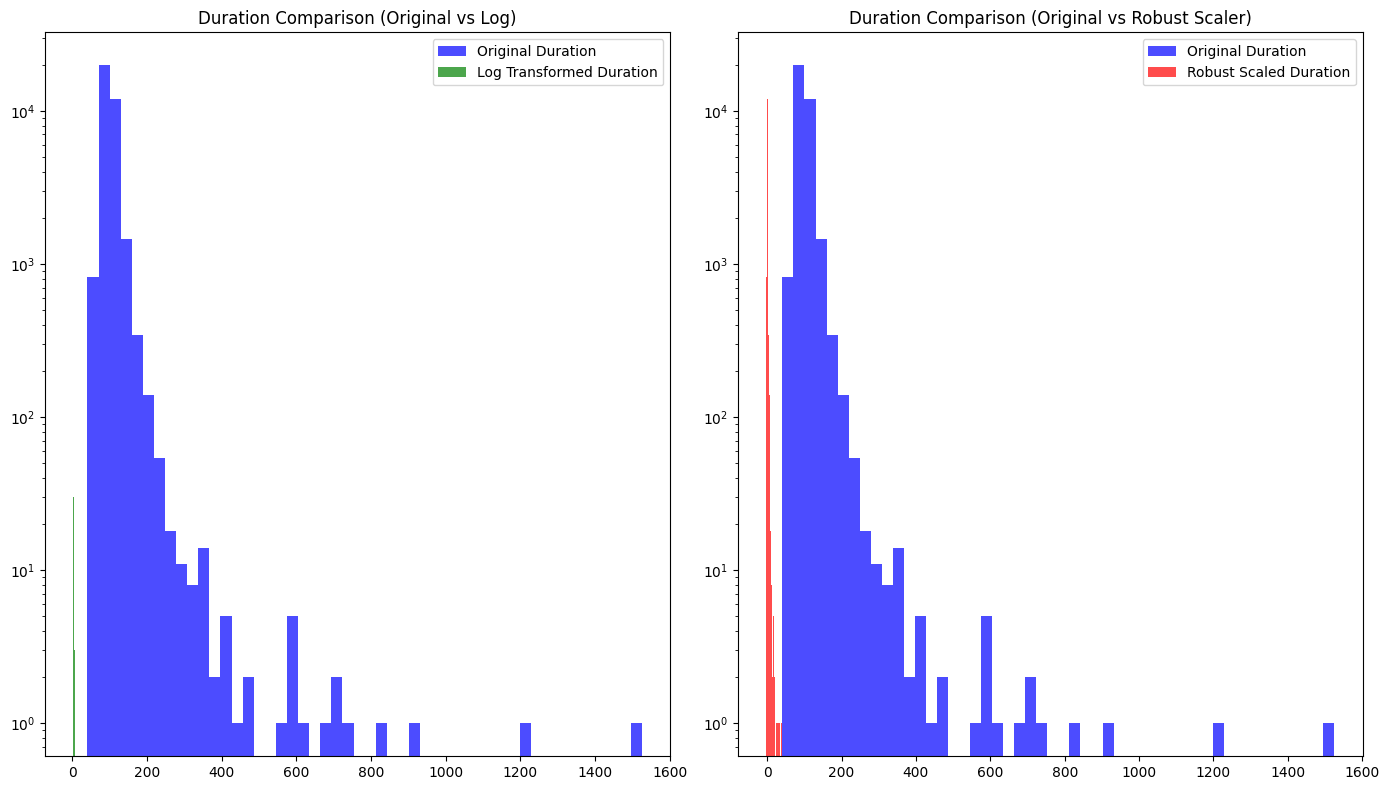

In [31]:
# print(dataset[['duration', 'duration_log', 'duration_robust']].head())


# Compare results creating a graph
plt.figure(figsize=(14, 8))

# Histograms of original, log-transformed and robust scaled duration
plt.subplot(1, 2, 1)
plt.hist(dataset['duration'], bins=50, color='blue', alpha=0.7, label='Original Duration')
plt.hist(dataset['duration_log'], bins=50, color='green', alpha=0.7, label='Log Transformed Duration')
plt.legend(loc='upper right')
plt.title('Duration Comparison (Original vs Log)')
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.hist(dataset['duration'], bins=50, color='blue', alpha=0.7, label='Original Duration')
plt.hist(dataset['duration_robust'], bins=50, color='red', alpha=0.7, label='Robust Scaled Duration')
plt.legend(loc='upper right')
plt.title('Duration Comparison (Original vs Robust Scaler)')
plt.yscale('log')

plt.tight_layout()
plt.show()

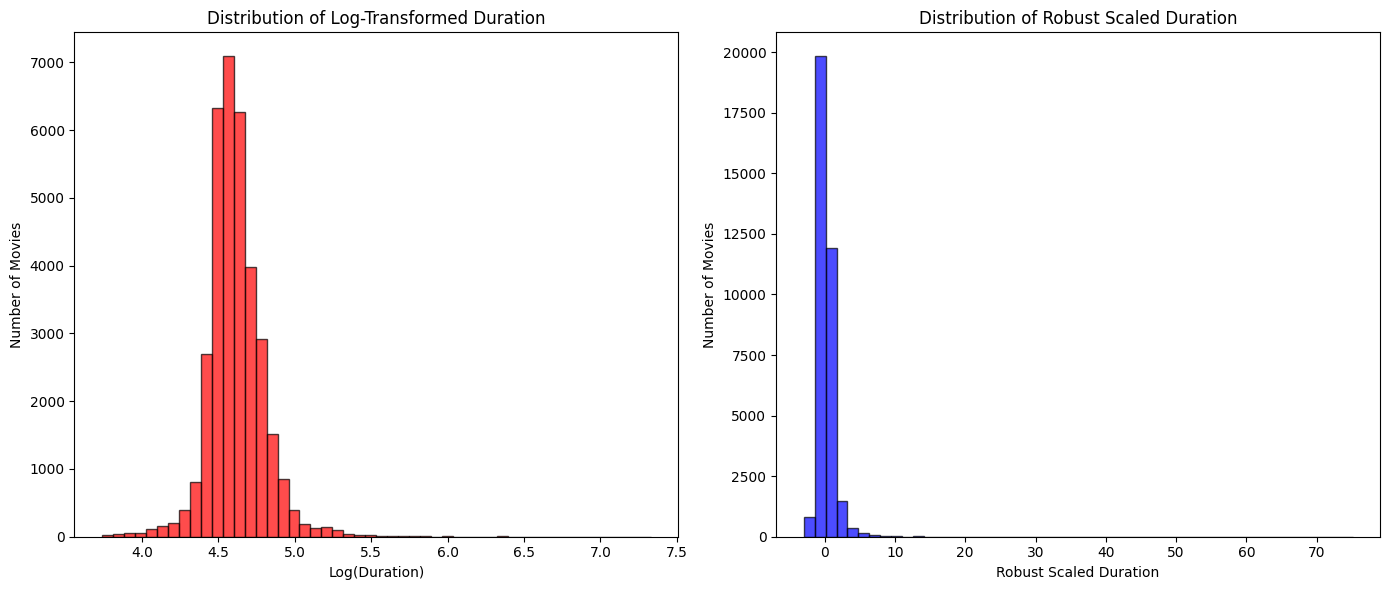

In [32]:
# Graphs creation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Log Transformation
axes[0].hist(dataset['duration'].apply(lambda x: np.log(x + 1)), bins=50, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title("Distribution of Log-Transformed Duration")
axes[0].set_xlabel('Log(Duration)')
axes[0].set_ylabel('Number of Movies')
axes[0].set_xscale('linear')

# RobustScaler
axes[1].hist(scaler.fit_transform(dataset[['duration']]), bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Distribution of Robust Scaled Duration")
axes[1].set_xlabel('Robust Scaled Duration')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()

Since duration data are very asymmetric and with "extreme" outliers (movies whose duration is higher than 1000 minutes), the 'log transformation' normalisation is a very valid option for duration normalisation. After this step, duration will have a more uniform distribution and will not have outliers any more.

Robust scaler option is not optimal in this case, since it does not treat the outlier issue as good as the other technique. In addition, the output of this normalisation procedure has negative values, too. As a consequence, the application of the 'duration_robust' column in the final recommendation model could result more complicated. For these reasons, I decided to definitevely apply the 'log transformation' technique and to drop the 'duration_robust' column, since it will not be useful in the following steps.

In [33]:
# Drop 'duration_robust' column
dataset = dataset.drop(columns=['duration_robust'])
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating',
       'duration_log'],
      dtype='object')

### Genre analysis

Since 'genre' column has only 30 unique values, it could be encoded. This means each genre will be represented with a number. This will semplify some analysis and processing steps reguarding the genre information.

In [34]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder initialisation
label_encoder = LabelEncoder()

# LabelEncoder application on 'genre' column
dataset['genre_encoded'] = label_encoder.fit_transform(dataset['genre'])

print(dataset[['genre', 'genre_encoded']].head())
dataset.select_dtypes(include=['float64', 'int64']).columns

      genre  genre_encoded
1     Drama              8
2  Romantic             19
3    Comedy              5
4    Comedy              5
5       Spy             24


Index(['filmtv_id', 'year', 'duration', 'avg_vote', 'total_votes', 'humor',
       'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating',
       'duration_log', 'genre_encoded'],
      dtype='object')

### Correlation analysis

                 filmtv_id      year  duration  avg_vote  total_votes  \
filmtv_id         1.000000  0.580085  0.037322 -0.109625    -0.062517   
year              0.580085  1.000000  0.104583 -0.217887     0.097032   
duration          0.037322  0.104583  1.000000  0.149793     0.194813   
avg_vote         -0.109625 -0.217887  0.149793  1.000000     0.254480   
total_votes      -0.062517  0.097032  0.194813  0.254480     1.000000   
humor            -0.317033 -0.162168 -0.002598  0.108793     0.253377   
rhythm           -0.604644 -0.308152  0.020964  0.157206     0.285177   
effort           -0.251141 -0.092140  0.133921  0.386685     0.344558   
tension          -0.432671 -0.261733  0.072236  0.300902     0.303659   
erotism          -0.240220 -0.088024  0.049854  0.089366     0.201972   
weighted_rating  -0.144140 -0.233409  0.164879  0.791418     0.479954   
duration_log      0.039113  0.147853  0.896509  0.152064     0.255456   
genre_encoded     0.006009 -0.059388 -0.020846  0.0

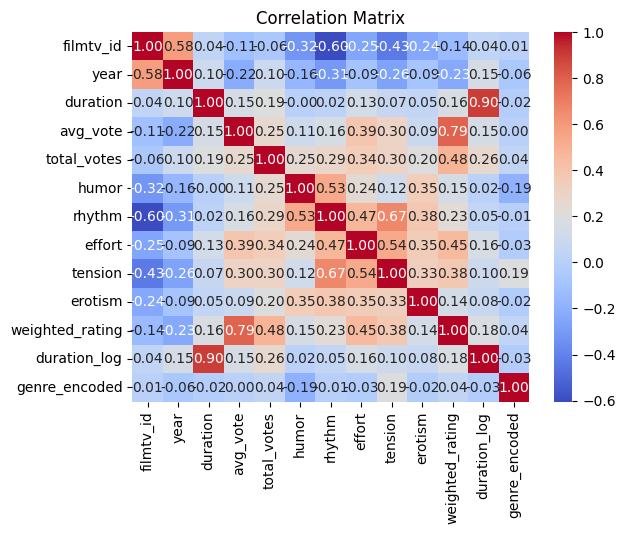

In [35]:
# Select only numerical columns
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = dataset[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

## Dataset filtering

### Actors and director count (and extraction)
I want to extract from the "actors" and "directors" columns the number of actors and directors in the dataset.
Since these columns contain multiple names for each movie, I have to extract single names.

In [36]:
# Extract the "directors" column
directors = dataset['directors']

# Drop missing values (if any)
directors = directors.dropna()

# Split comma-separated director names into a list (if applicable)
director_list = directors.str.split(",").explode().str.strip()

# Get unique director names
unique_directors = director_list.unique()
number_of_directors = len(unique_directors)
print("Number of directors in the dataset: ", number_of_directors)

# Print the list of unique directors
# for index, director in enumerate(unique_directors):
#     print(index, director)

Number of directors in the dataset:  12062


In [37]:
# Extract the "actors" column
actors = dataset['actors']

# Drop missing values (if any)
actors = actors.dropna()

# Split comma-separated actor names into a list (if applicable)
actor_list = actors.str.split(",").explode().str.strip()

# Get unique actor names
unique_actors = actor_list.unique()
number_of_actors = len(unique_actors)
print("Number of actors in the dataset: ", number_of_actors)

# Print the list of unique actors
# for index, actor in enumerate(unique_actors):
#     print(index, actor)

Number of actors in the dataset:  86647


In [38]:
# Extract the "conuntry" column
countries = dataset['country']

# Drop missing values (if any)
countries = countries.dropna()

# Split comma-separated contry names into a list (if applicable)
country_list = countries.str.split(",").explode().str.strip()

# Get unique countries
unique_countries = country_list.unique()
number_of_countries = len(unique_countries)
print("Number of countries in the dataset: ", number_of_countries)

# Print the list of unique countries
for index, country in enumerate(unique_countries):
    print(index, country)

Number of countries in the dataset:  141
0 Italy
1 United States
2 Germany
3 Israel
4 Great Britain
5 Spain
6 France
7 Sweden
8 Yugoslavia
9 Argentina
10 Greece
11 Austria
12 Czechoslovakia
13 Netherlands
14 Soviet Union
15 Mexico
16 New Zealand
17 Australia
18 Switzerland
19 Japan
20 Turkey
21 Canada
22 Norway
23 Belgium
24 Hong Kong
25 Brazil
26 Taiwan
27 India
28 Luxembourg
29 Poland
30 Hungary
31 Philippines
32 Iran
33 South Africa
34 Portugal
35 Ireland
36 Denmark
37 Indonesia
38 China
39 Botswana
40 Finland
41 Afghanistan
42 Egypt
43 West Germany
44 Bulgaria
45 Panama
46 Lithuania
47 Burkina Faso
48 Russia
49 Tunisia
50 Senegal
51 Colombia
52 England
53 Algeria
54 Cuba
55 Macedonia
56 Romania
57 Vietnam
58 Czech Republic
59 Netherlands Antilles
60 Croatia
61 Kazakhstan
62 South Korea
63 Bosnia and Herzegovina
64 Ukraine
65 Tajikistan
66 Bhutan
67 Lebanon
68 Venezuela
69 Chile
70 Nepal
71 Malta
72 Georgia
73 Ivory Coast
74 Thailand
75 Palestine
76 Iceland
77 Peru
78 Morocco
79 Uzb

### Movies classification with respect to duration

In [39]:
count = 0
durata = dataset['duration']

# Drop missing values (if any)
durata = durata.dropna()

for minutes in durata:
    if minutes < 1800:
        count += 1
print(count)

dataset['duration_category'] = pd.cut(durata, bins=[0, 60, 120, 180, float('inf')], 
                                 labels=['Short', 'Medium', 'Long', 'Epic'])

print(dataset.head())
dataset.columns

34625
   filmtv_id                            title  year     genre  duration  \
1          3        18 anni tra una settimana  1991     Drama        98   
2         17                 Ride a Wild Pony  1976  Romantic        91   
3         18                            Diner  1982    Comedy        95   
4         20  A che servono questi quattrini?  1942    Comedy        85   
5         21           The Uranian Conspiracy  1978       Spy       117   

                  country                             directors  \
1                   Italy                         Luigi Perelli   
2           United States                           Don Chaffey   
3           United States                        Barry Levinson   
4                   Italy                        Esodo Pratelli   
5  Italy, Germany, Israel  Gianfranco Baldanello, Menahem Golan   

                                              actors  avg_vote  total_votes  \
1  Kim Rossi Stuart, Simona Cavallari, Ennio Fant...       6.

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating',
       'duration_log', 'genre_encoded', 'duration_category'],
      dtype='object')

### Filtering methods

In [40]:
def filter_movies(dataset, genre=None, min_duration=None, max_duration=None, actors=None, directors=None, start_year=None, end_year=None):
    """
    Filters the movies dataset based on user inputs.
    
    Parameters:
        dataset (DataFrame): The dataset of movies.
        genre (str): Filter movies by genre.
        max_duration (int): Maximum duration of movies.
        actors (str): Filter movies by actor name (partial or full match).
        directors (str): Filter movies by director name (partial or full match).
        start_year (int): Start year for filtering movies (inclusive).
        end_year (int): End year for filtering movies (inclusive).
    
    Returns:
        DataFrame: Filtered dataset based on the given parameters.
    """
    filtered = dataset.copy()

    # Filter by genre
    if genre:
        filtered = filtered[filtered['genre'].str.contains(genre, case=False, na=False)]

    # Filter by duration (min)
    if min_duration is not None:
        filtered = filtered[min_duration <= filtered['duration']]

    # Filter by duration (max)
    if max_duration is not None:
        filtered = filtered[filtered['duration'] <= max_duration]

    # Filter by actors
    if actors:
        filtered = filtered[filtered['actors'].str.contains(actors, case=False, na=False)]

    # Filter by directors
    if directors:
        filtered = filtered[filtered['directors'].str.contains(directors, case=False, na=False)]

    # Filter by year
    if start_year is not None:
        filtered = filtered[filtered['year'] >= start_year]
    if end_year is not None:
        filtered = filtered[filtered['year'] <= end_year]

    return filtered

In [41]:
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating',
       'duration_log', 'genre_encoded', 'duration_category'],
      dtype='object')

In [49]:
selection = filter_movies(dataset, title="Oppenheimer")
selection.sort_values(by='weighted_rating', ascending=False)

TypeError: filter_movies() got an unexpected keyword argument 'title'

In [43]:
def search_movie(dataset, title=None):
    filtered = dataset.copy()
    if title:
        filtered = filtered[filtered['title'].str.contains(title, case=False, na=False)]
    return filtered

In [44]:
movie = search_movie(dataset, title="The Godfather Part II")
movie

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,total_votes,description,humor,rhythm,effort,tension,erotism,weighted_rating,duration_log,genre_encoded,duration_category
3331,4992,The Godfather Part II,1974,Drama,185,United States,Francis Ford Coppola,"Robert De Niro, Diane Keaton, Al Pacino, Gasto...",9.1,585,It is 1901 when Vito Corleone reaches the Unit...,1,4,4,3,1,8.878813,5.225747,8,Epic


## Pre-processed dataset saving

In [45]:
dataset.columns

Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'total_votes', 'description',
       'humor', 'rhythm', 'effort', 'tension', 'erotism', 'weighted_rating',
       'duration_log', 'genre_encoded', 'duration_category'],
      dtype='object')

In [46]:
# Save the dataset in the 'data' folder
output_path = "C:/Users/beltr/OneDrive/Desktop/DDSE_PROJECT/MoviesRecommender/data/preprocessed_filmtv_movies.csv"
dataset.to_csv(output_path, index=False) # index=False: row indexes are not saved in the file